<img src="ups.png" width="800"/>

## Intercycle Project: Simulation of Call Attention in a Call Center - PuntoNet


## Student: Damián Gutiérrez Meneses


This example allows you to simulate the process of calling a Call Center from a Telecommunications company that provides Internet services. Similarly, it is important to note that this example addresses the following points:

- Waiting states for other processes
- Resources: Resource class

### Characteristics of the real system to simulate
It is important to note that the Call Center business has characteristics of its nature, we establish these peculiarities to keep in mind at the time of carrying out the simulation:

### Development of the simulation
Next, we proceed to develop the simulation.

We establish the required parameters:

- Variables of interest
- Simulation time
- Initialization parameters (number of operators, service times, interval of incoming calls, etc).

- The Call Center is managed with a number of 10 operators.
- You can receive a certain number of calls simultaneously, those that are not being attended will have to wait in the call queue.
- Once a call is answered by a Call Center operator, you can not enter another call to the same operator, only at the end of the call you can leave the line free to be free and available to be answered another call.


- Call entry time interval: 5 to 10 minutes.


- Time of attention in case of consultations: From 3 to 6 minutes.
- Attention time in case of complaints: From 5 to 15 minutes.
- Attention time in case of technical support: From 10 to 30 minutes.
- Number of calls waiting: 10 calls
- Number of operators: 10 operators


### Objective of the simulation
The objective is to simulate an environment of customer calls to a Call Center, indicating the number of customers served, the time of attention for each call, the number of customers who may be waiting for a call, etc. With the aim of obtaining statistics in search of improvement in the quality of service to customers.


<<<<<<<<<<<<<<<<<<<<<<<<<<  Callcenter de Puntonet  >>>>>>>>>>>>>>>>>>>>>>>>
Tipo de llamada: 0    soporte
Name: Tipo_llamada, dtype: object
Duracion llamada: 0    10.0
Name: Minutos_d, dtype: float64
Ingresa llamada de: Cliente 263 Tipo-soporte a la hora 0.00.
Ingresa llamada de: Cliente 264 Tipo-consultas a la hora 0.00.
Ingresa llamada de: Cliente 265 Tipo-soporte a la hora 0.00.
Ingresa llamada de: Cliente 266 Tipo-soporte a la hora 0.00.
Ingresa llamada de: Cliente 267 Tipo-reclamos a la hora 0.00.
Ingresa llamada de: Cliente 268 Tipo-reclamos a la hora 0.00.
Ingresa llamada de: Cliente 269 Tipo-reclamos a la hora 0.00.
Ingresa llamada de: Cliente 270 Tipo-soporte a la hora 0.00.
Ingresa llamada de: Cliente 271 Tipo-consultas a la hora 0.00.
Ingresa llamada de: Cliente 272 Tipo-reclamos a la hora 0.00.
Se atiende llamada: Cliente 263 Tipo-soporte a la hora 0.00.
Se atiende llamada: Cliente 264 Tipo-consultas a la hora 0.00.
Se atiende llamada: Cliente 265 Tipo-soporte a la hora 0.

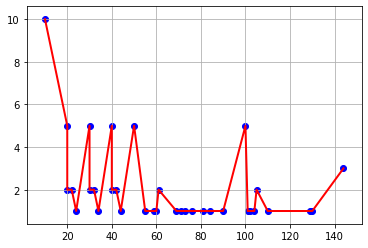

In [174]:
### Codigo de Implementación

import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de llamadas que puede recibir el call center
MAX_LLAMADAS = 115
# Total de operadores con que cuenta el call center
NUM_OPERADORES = 10
# Tiempo que tarda en atenderse una llamada (minutos)
TIEMPO_LLAMADA = 10
# Intervalo de tiempo en que ingresan las llamadas (minutos)
INTERVALO_LLAMADA = 5
# Tiempo de simulación
TIEMPO_SIMULACION = 150
import pandas as pd
df = pd.read_excel('123.xlsx', sheet_name='Hoja1')
totfil= format(len(df))
tll=df['Tipo_llamada']
hd=df['Minutos_d']
intervalol=df['Minutos_i']
codigo=df['codigo']


# Creamos un diccionario para almacenar las horas en que se atienden las llamadas
tiempo={}

class Callcenter(object):
    
    def __init__(self, environment, num_operadores, tiempo_llamada):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa los operadores
        self.operadores = simpy.Resource(environment, num_operadores)
        # Variable para el tiempo de atencion de llamada
        self.tiempo_llamada = tiempo_llamada
        
    def atender_llamada(self, cliente):
        # Este metodo representa el proceso de atencion de llamada
        # Ingresa la llamada y se atiendea
        
        # Simulamos el tiempo que tarda en atenderse una llamada
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'atención' se realice
        yield self.env.timeout(TIEMPO_LLAMADA)
        
        # Simulamos que se ha atendido parte (%) de la llamada del cliente
        # Para el porcentaje de simulacion generamos un entero entre 30 y 90
        print('Atendido  {%d%%} llamada del cliente => %s ' % (random.randint(30,90), cliente))
        
    
def entra_llamada(env, nombre, callcenter):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el cliente con el nombre pasado como parametro
    print('Ingresa llamada de: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # al operadpr
    with callcenter.operadores.request() as operadorcc:
        # Ocupamos la maquina de lavado
        yield operadorcc
        # Indicamos que llamada entra a la callcenter
        print('Se atiende llamada: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(callcenter.atender_llamada(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha atendido al cliente
        print('Cliente [%s] atendido a las %.2f.' % (nombre, env.now))

        k=env.now
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
# se recibe parametros 
def ejecutar_simulacion(env, max_llamadas, num_operadores, tiempo_llamada, intervalo):
    
    callcenter=Callcenter(env, num_operadores, tiempo_llamada)
    
    
    # Creamos x llegadas de clientes iniciales
    for i in range(max_llamadas):
        env.process(entra_llamada(env, 'Cliente %s'%codigo[i]+' Tipo-%s'%tll[i],callcenter))
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(intervalol[i]) #reserva recurso
        i+=1
        # Mientras se atienden las llamadas generamos mas llamadas
        env.process(entra_llamada(env,'Cliente %s'%codigo[i]+' Tipo-%s'%tll[i],callcenter))
        
#########
#Entorno de simulación
#Inicio de la simulación
print('<<<<<<<<<<<<<<<<<<<<<<<<<<  Callcenter de Puntonet  >>>>>>>>>>>>>>>>>>>>>>>>')
print('Tipo de llamada:',tll.iloc[0:1]) #saco de columna tipo_llamada 1er dato 
print('Duracion llamada:',hd.iloc[0:1]) #saco de columna duracion_llamada 1er dato 
random.seed(77)
env=simpy.Environment()

#envia env, num_max_llamadas, num_operadores, duracion_llamada, intervalo
env.process(ejecutar_simulacion(env, 10, NUM_OPERADORES, int(hd.iloc[0:1]) ,int(intervalol.iloc[0:1])))
    
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## You can find more information in this video:

https://www.youtube.com/watch?v=LXdv1SSCib4

## Referencias:
[1] https://www.geeksforgeeks.org/basics-of-discrete-event-simulation-using-simpy/

[2] http://heather.cs.ucdavis.edu/~matloff/156/PLN/DESimIntro.pdf

[3] https://simpy.readthedocs.io/en/latest/